# Abstract 

This work pursues the use of scientific python, particularly the use of the scipy library to study the transfer functions of a few systems. Bode plots and time domain responses of the system are obtained and studied using inbuilt tools.

# Introduction

The report pursues broadly the following three problems.
- The use of bode plots to understand the behaviour of systems whose responses are known in the laplace domain. Here, the scipy.signal.impulse function is used.
- The use of the laplace transforms to analyse the given systems by determining their transfer functions and plotting the corresponding bode plots. This discussion primarily revolves around a second order low pass filter. By applying inputs of multiple frequencies, the behaviour of this system is studied and understood.

# Method and code-

The necessary libraries are imported in the following piece of code. A helper function is also defined. This is essentially the unit step function $u(t)$.


In [4]:
from __future__ import division
% matplotlib inline
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
matplotlib.rcParams.update({'font.size': 18})
import scipy.signal as sp
size=(10,8)

In [5]:
# defining useful functions
def u(t):
    return 1*(t>=0)

def plotfigure(figsize,xlabel,ylabel,title,x,y,style="k-",graph="plot"):
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if graph=="plot":
        plt.plot(x,y,style)
    if graph== "semilogx":
        plt.semilogx(x,y,style)
    if graph== "semilogy":
        plt.semilogy(x,y,style)
    if graph== "loglog":
        plt.loglog(x,y,style)
    plt.tight_layout()
    plt.show()
    plt.close()

## Problem1

A system modeled by the following differential equation is studied here. 
\begin{equation}\label{eqn.diff}
\ddot{x} + 2.25x = f(t)
\end{equation}
where $f(t)$ is given by 
\begin{equation}
f(t) = cos(bt)e^{-at}u(t)
\end{equation} whose laplace transform is given by
\begin{equation}\label{eqn.F}
F(s) = \frac{s+a}{(s+a)^2 + b^2}
\end{equation}. Here we choose $a = 0.5$ and $b = 1.5$. $x$ is the time domain response of the system. The following initial conditions are given to us $\dot{x}(0)=0$ and $x(0)=0$. Switching to the laplace domain the differential equation (equation \ref{eqn.diff}) leads to the following
\begin{equation}
X(s) = \frac{s + 0.5}{s^4 + s^3 + 4.75s^2 + 2.25s + 5.625}
\end{equation}. This transfer function is passed to the $sp.impulse$ function whose job is to essential convert this and the initial conditions into the time domain response which is then plotted.

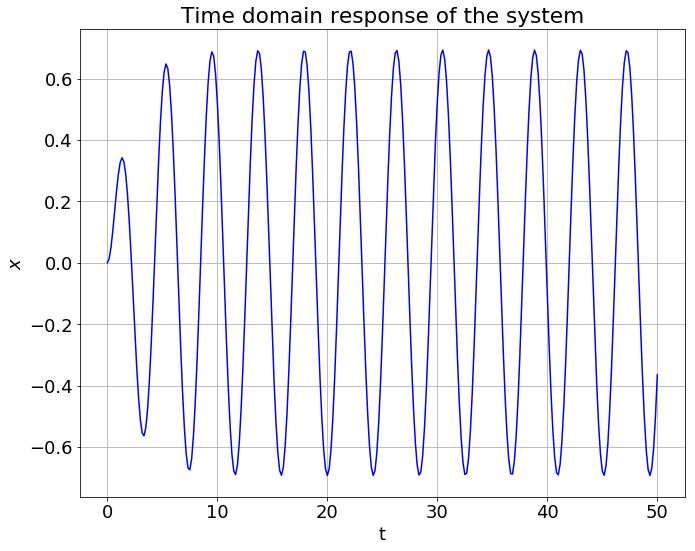

In [6]:
# Problem 1
den=[1,1,4.75,2.25,5.625]
num=[1,0.5]
X= sp.lti(num,den)
T= np.linspace(0,50,301)
t,y=sp.impulse(X,None,T)
plotfigure(size,"t","$x$","Time domain response of the system",t,y,"b-")

## Problem 2 

Now, the above procedure is repeated for $a = 0.05$. The magnitude plots of the responses for both the inputs in the s domain are captured and plotted for comparision.


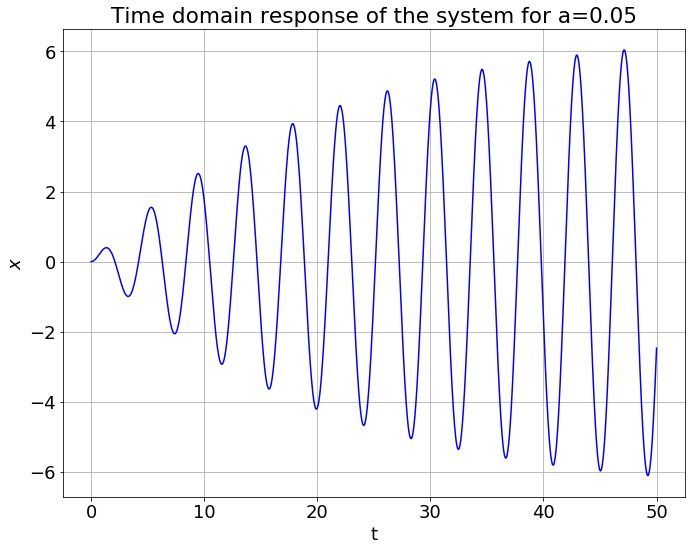

In [7]:
num= [1,0.05]
den=[1,0.1,4.5025,0.225,5.06813]
X= sp.lti(num,den)
T= np.linspace(0,50,3001)
t,y=sp.impulse(X,None,T)
plotfigure(size,"t","$x$",
           "Time domain response of the system for a=0.05",t,y,"b-")

## Problem 3 

With the same amount of decay, the input frequency is changed from $1.4rad s^{-1}$ to $1.6rad s^{-1}$ in steps of $0.05$. The output time domain responses are graphed and studied.


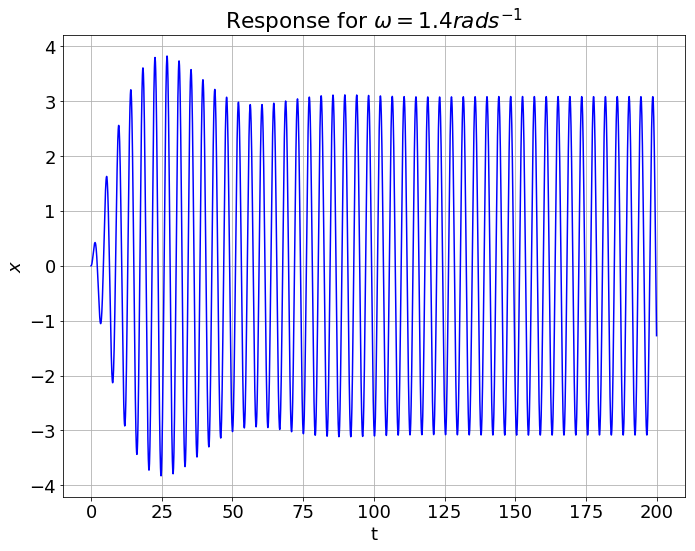

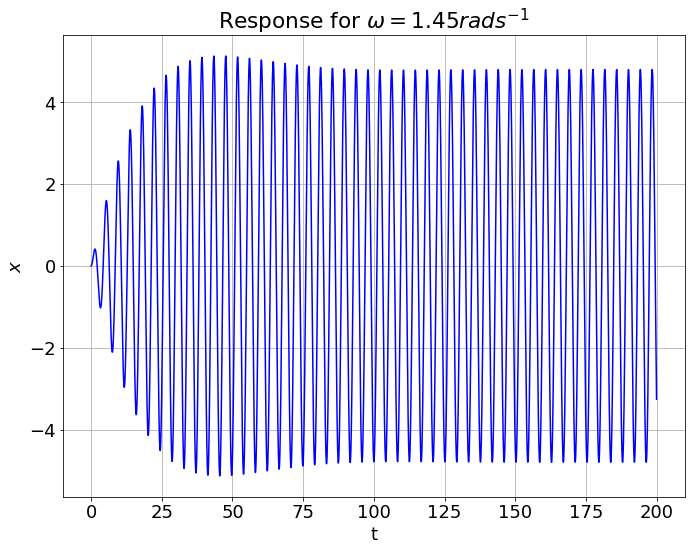

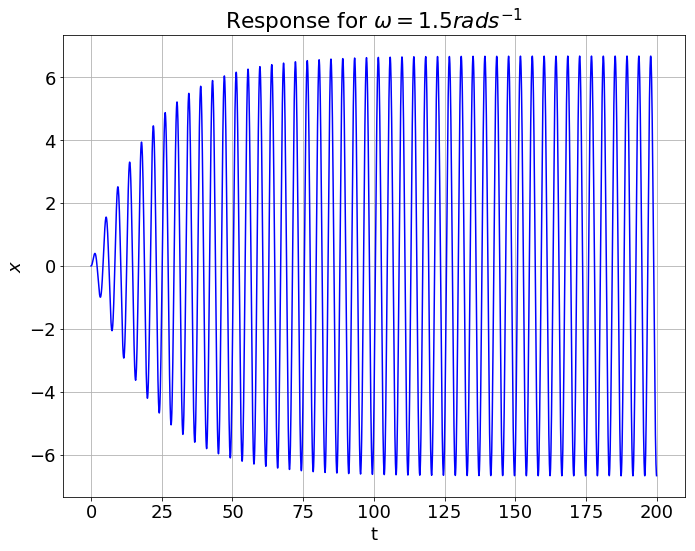

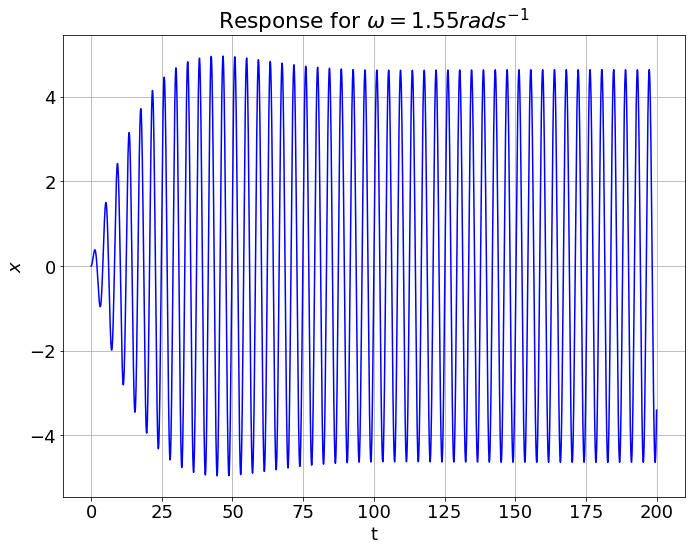

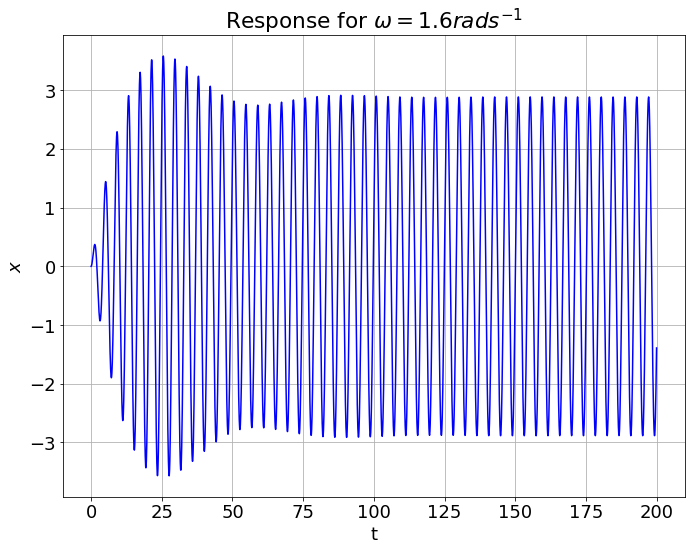

In [8]:
H=sp.lti([1],[1,0,2.25])
o=[]
t=np.linspace(0,200,4001)

for i in np.arange(1.4,1.65,0.05):
    ip= (np.cos(i*t))*(np.exp(-0.05*t))*u(t)
    T,op,svec= sp.lsim(H,ip,t)
    plotfigure(size,"t","$x$",
               "Response for $\omega = $"+str(i)+"$rad s^{-1}$",T,op,"b-")
#     plt.figure(figsize=size)   
#     plt.plot(T,op)
#     plt.show()
#     plt.close()

## Problem 4 

Next the following pair of coupled differential equations are considered-
\begin{align}
\ddot{x}+ (x-y) &= 0\\
\ddot{y} + 2(y-x) &= 0\\
\end{align}
The initial conditions provided are $x(0)=1$ and $\dot{x}(0)= \dot{y}(0)=y(0)=0$. Working out the math using unilateral laplace transforms, 
\begin{align}
X(s)&= \frac{s^2+2}{s^3+3s}\\
Y(s)&= \frac{2}{s^3+3s}\\
\end{align}
These are passed to the $sp.impulse$ functions to study the behaviour of the system.


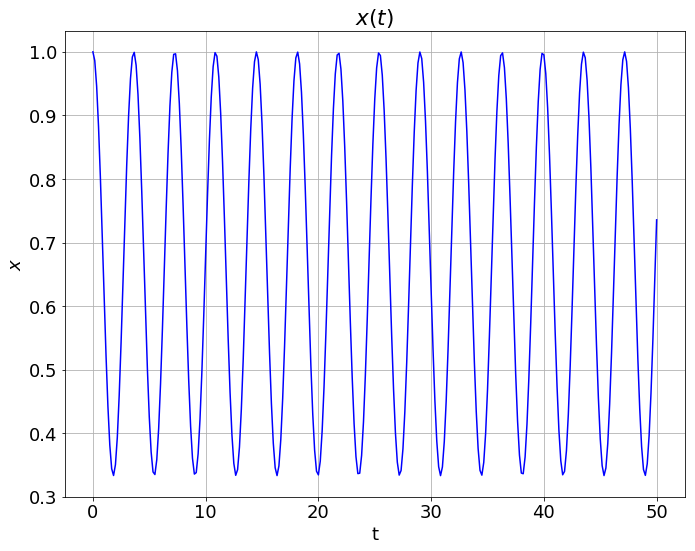

In [9]:
num= [1,0,2]
den=[1,0,3,0]
X= sp.lti(num,den)
T= np.linspace(0,50,301)
t,y=sp.impulse2(X,None,T)
plotfigure(size,"t","$x$","$x(t)$",t,y,"b-")

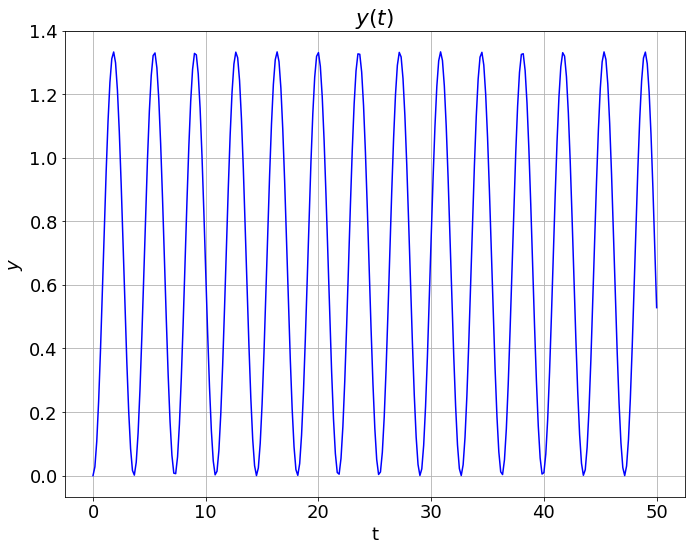

In [10]:
num= [2]
den=[1,0,3,0]
X= sp.lti(num,den)
T= np.linspace(0,50,301)
t,y=sp.impulse2(X,None,T)
plotfigure(size,"t","$y$","$y(t)$",t,y,"b-")

## Problem 4

# insert image
The above circuit is a second order low pass filter with the transfer function 
\begin{equation}
H(s) = \frac{1}{\frac{s^2}{\omega_0^2}+ \frac{s}{\omega_0Q} +1} 
\end{equation} with 
\begin{align}
\omega_0 &= \frac{1}{\sqrt{LC}}\\
Q &= \frac{1}{R}\sqrt{\frac{L}{C}}\\
\end{align}
Thus 
H(s) is 
\begin{equation}
H(s)=\frac{1}{10^{-12}s^2+10^{-4}s+1}
\end{equation}
The magnitude and phase plot for this tranfer function are plotted.

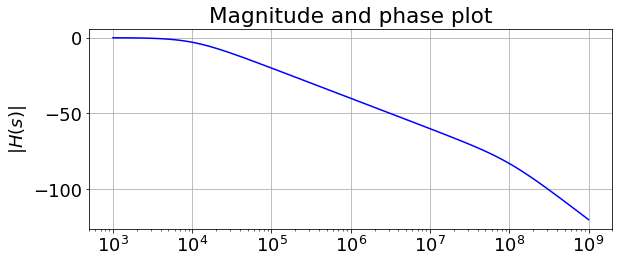

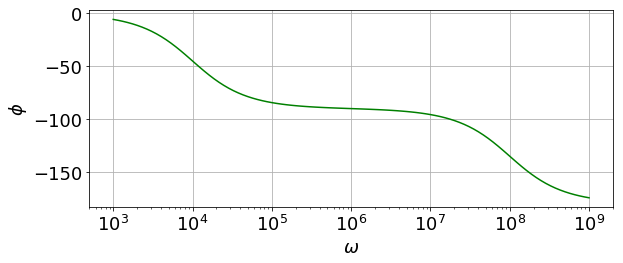

In [11]:
den=[10**(-12),10**(-4),1]
num=[1]
X= sp.lti(num,den)
w,S,phi=X.bode()
plotfigure((9,4),"","$|H(s)|$",
           "Magnitude and phase plot",w,S,"b-",graph="semilogx")
plotfigure((9,4),"$\omega$","$\phi$",
           "",w,phi,"g-",graph="semilogx")


## Problem 6 

The above RLC low pass filter is given the following input
\begin{equation}
v_i(t)= cos(10^3t)u(t)-cos(10^6t)u(t)
\end{equation}
Since this is a second order low pass filter, two intital conditions are required to perform the necessary calculations. Since the output can not appear before the input, it must follow that $v_0(0^-)=0$. Further before $t=0$ any existent unforced current must have died to zero. This current (for the series RLC circuit) is given by $C\frac{dv_0}{dt}$. which imples $\dot{v_0}$ is zero. Therefore with zero intital conditions, the $sp.lsim$ function is used to obtain the output of the system.  

In [12]:
t=np.arange(0,10**(-1), 10**(-7))
f= (np.cos(1000*t)-np.cos((10**(6))*t))*u(t)
T,op,svec= sp.lsim(X,f,t)

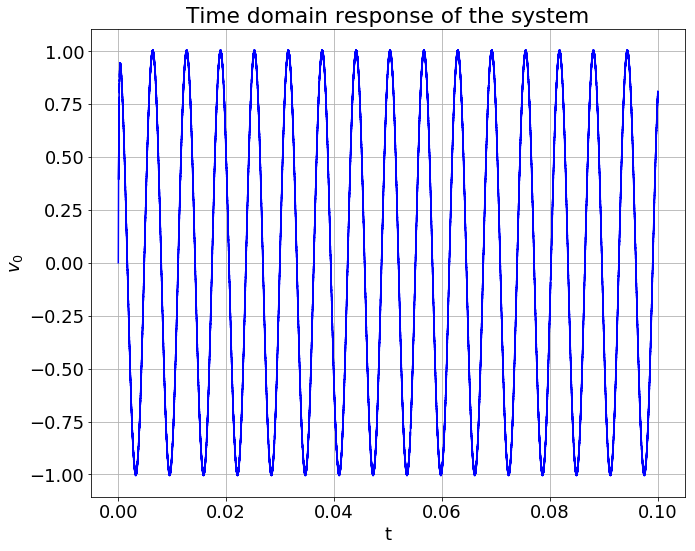

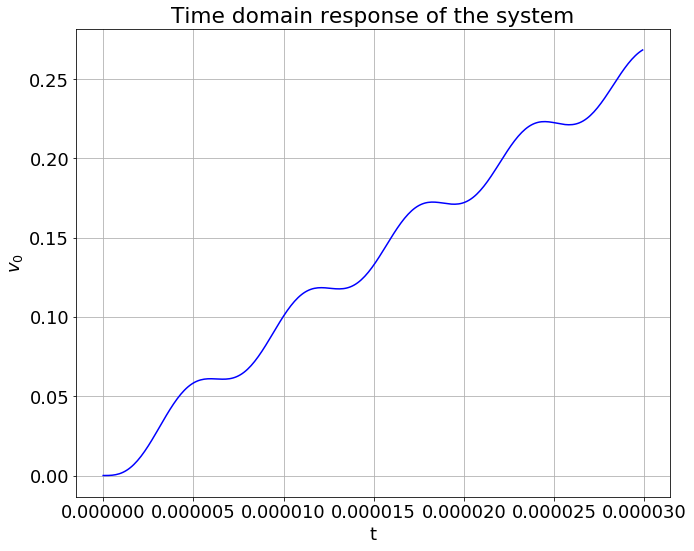

In [13]:
plotfigure(size,"t","$v_0$","Time domain response of the system", T, op, "b-")
plotfigure(size,"t","$v_0$","Time domain response of the system", T[:300], op[:300], "b-")


# Discussion and conclusion





- The first differential equation basically describes a second order system with infinite quality factor. This translates to the natural modes of the system lasting forever once the excitation is given (the system ringing). Thus for the decaying sinusoid input given the system displays behaviour that can be modeled as $ (A + Be^{\alpha t})cos(\omega t)$ and the exponential decay eventually leads to only the natural mode existing.
- For the second case, the analysis remains the same as before except for the fact that the factor $\alpha$ is much smaller leading to slower decay. This means the forced response lasts much longer.
- For the third case, the equation represents a model moving from poorly tuned to tuned to well tuned as the fruequecy is swept from less than the resonant frequency through the resonant frequency to greater than resonant frequency. For those values of the frequency other than $1.5 rad s^{-1}$, the response after a long time dies down to the natural frequecny sinusoid.
- The fifth problem is essentially a low pass filter. It of course displays the corresponding bode plot with two poles. It initally has no decay, then falls off at $20dB/dec$ and then $40 dB/dec$. The phase plot also shows inital zero phase then a phase of $\frac{-\pi}{2}$ followed by a phase of $-\pi$. 
- When a superposition of a high frequency and low frequency signal is applied to the low pass filter, it attenuates the high frequency componenents which is why the long term response is the low frequency component. However some of it still remains and adds to the low frequnency component which is why on smaller time scales, a high frequency time variation is seen.

In conclusion, the features offered by $scipy.signal$ can be used effectively to study systems in the laplace and time domains as has been done for a few second order systems in this work.

In [15]:
sp.lti.bode?

In [16]:
sp.impulse?

In [18]:
sp.lsim?